In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

X = np.random.randn(1000, 20)
y = (np.sum(X, axis=1) > 0).astype(int)

In [2]:
bn_model = models.Sequential([
    layers.Dense(64, activation=None, input_shape=(20,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64, activation=None),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])

ln_model = models.Sequential([
    layers.Dense(64, activation=None, input_shape=(20,)),
    layers.LayerNormalization(),
    layers.Activation('relu'),
    layers.Dense(64, activation=None),
    layers.LayerNormalization(),
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\Bluepal\anaconda3\envs\python_course\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
bn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ln_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
history_bn = bn_model.fit(X, y, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6350 - loss: 0.6727
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8200 - loss: 0.4205
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8830 - loss: 0.3153
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9120 - loss: 0.2509
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9160 - loss: 0.2194
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9450 - loss: 0.1991
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9440 - loss: 0.1771
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9450 - loss: 0.1630
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9470 - loss: 0.1470
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9520 - loss: 0.1364
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9640 - loss: 0.1308
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy:

In [6]:

history_ln = ln_model.fit(X, y, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6640 - loss: 0.6037
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8770 - loss: 0.3662
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9390 - loss: 0.2317
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9610 - loss: 0.1592
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9790 - loss: 0.1134
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9830 - loss: 0.0884
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9910 - loss: 0.0645
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9920 - loss: 0.0506
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9950 - loss: 0.0393
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9980 - loss: 0.0301
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9990 - loss: 0.0245
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1

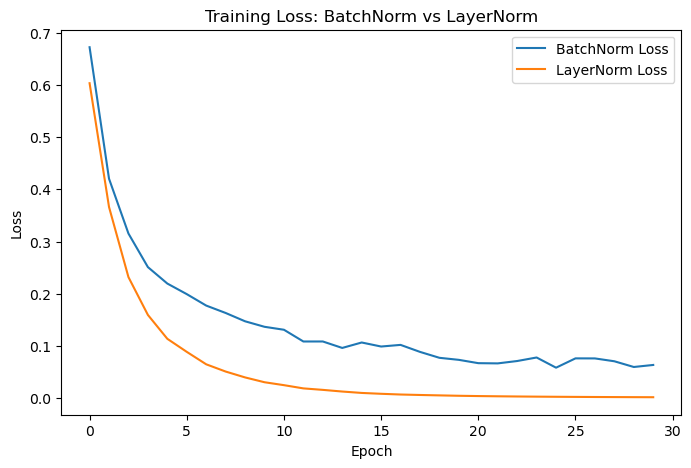

In [7]:
plt.figure(figsize=(8,5))
plt.plot(history_bn.history['loss'], label='BatchNorm Loss')
plt.plot(history_ln.history['loss'], label='LayerNorm Loss')
plt.title("Training Loss: BatchNorm vs LayerNorm")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()